In [13]:
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd
import numpy as np

import sys
sys.path.append("../../../../src/")
import nanonets
import nanonets_utils
%matplotlib inline

In [22]:
N_voltages      = 101
N_p             = 5
voltages        = np.zeros(shape=(N_voltages,9))
voltages[:,0]   = 0.1
gate_vals       = np.linspace(-0.1,0.1,N_voltages)
voltages[:,-1]  = gate_vals
topology_params = {
    "Nx"                :   N_p,
    "Ny"                :   N_p,
    "Nz"                :   1,
    "e_pos"             : [[0,0,0],[(N_p-1)//2,0,0],[N_p-1,0,0],[0,(N_p-1)//2,0],
                           [0,N_p-1,0],[N_p-1,(N_p-1)//2,0],[(N_p-1)//2,N_p-1,0],[N_p-1,N_p-1,0]],
    "electrode_type"    : ['constant','constant','constant','constant','constant','constant','constant','constant']
}

In [23]:
sim_class   = nanonets.simulation(topology_params)
sim_class.run_const_voltages(voltages,7,save_th=0.1)

In [24]:
arr     = sim_class.return_output_values()
x_val   = 1000*gate_vals
vals    = arr[:,2]
vals_e  = arr[:,3]

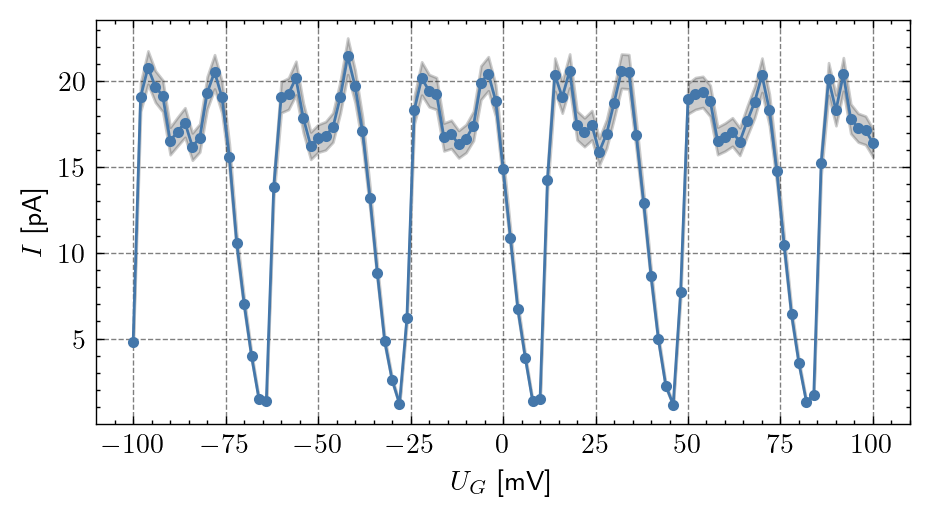

In [25]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    fig.set_figwidth(fig.get_figwidth()*1.5)
    
    ax.plot(x_val, vals, '.-')
    ax.fill_between(x_val, vals-vals_e, vals+vals_e, color='black', alpha=0.2) 
    ax.set_xlabel("$U_G$ [mV]")
    ax.set_ylabel("$I$ [pA]")
    fig.savefig(f"../plots/{N_p}_{N_p}_I_vs_gate_at_{voltages[0,0]}.svg", transparent=True)
    fig.savefig(f"../plots/{N_p}_{N_p}_I_vs_gate_at_{voltages[0,0]}.pdf", transparent=False)